# AI-Assisted Smart Video Editing Using Audio Signal Processing and Computer Vision

**Course:** AI Applications – Module E  
**Project Type:** Individual Open Project  
**Institute:** IIT Ropar  
**Student Name:** Vansh Virmani  
**Submission Date:** 17 January 2026


## Abstract

Manual video editing involves repetitive tasks such as removing silent
segments, detecting scene boundaries, and creating subtitles. This project
proposes an AI-assisted video editing system that automates these tasks using
audio signal processing, computer vision, and speech recognition techniques.
The system significantly reduces manual effort while maintaining acceptable
editing accuracy.

## 1. Problem Definition & Objective

### 1.1 Selected Project Track
AI Applications – Multimedia and Video Intelligence

### 1.2 Problem Statement
Video editors spend a significant amount of time performing repetitive tasks
such as trimming silent portions, identifying scene transitions, and generating
subtitles. These tasks are time-consuming and prone to human error.

### 1.3 Objective
The objective of this project is to design an AI-assisted system that:
- Automatically detects and removes silence
- Identifies scene changes using computer vision
- Generates time-aligned subtitles from speech


## 2. Data Understanding & Preparation

### 2.1 Dataset Source
The input data consists of self-recorded video files. No external public
dataset is used.

### 2.2 Data Description
- Format: MP4 video
- Audio: Speech-based mono audio
- Frame rate: 24–30 FPS

### 2.3 Preprocessing Steps
- Audio extraction from video
- Frame extraction for visual analysis
- Noise handling through energy thresholding


In [1]:
# Install required libraries (run once)
!pip3 install librosa opencv-python whisper matplotlib numpy

In [2]:
import cv2
import numpy as np
import librosa
import matplotlib.pyplot as plt
import subprocess

## 3. Model / System Design

### 3.1 AI Techniques Used
- Audio Signal Processing for silence detection
- Computer Vision for scene boundary detection
- Speech Recognition (NLP) for subtitle generation

### 3.2 System Pipeline
Input Video → Audio Extraction → Silence Detection →
Frame Analysis → Scene Detection → Subtitle Generation → Output Video

### 3.3 Design Justification
Threshold-based approaches are chosen for interpretability and low computational
complexity, making them suitable for academic evaluation.


In [3]:
# Extract audio from input video using FFmpeg
subprocess.call([
    "ffmpeg", "-y", "-i", "Final-Sample.mp4",
    "-ac", "1", "-ar", "16000", "audio.wav"
])

ffmpeg version 8.0.1 Copyright (c) 2000-2025 the FFmpeg developers
  built with Apple clang version 17.0.0 (clang-1700.4.4.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/8.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --

0

### Execution Environment

This notebook is intended to be executed in a local Python environment or
Google Colab with system-level access to FFmpeg. All files are referenced
using relative paths to ensure reproducibility.

## 4. Core Implementation: Silence Detection

Silence is detected using short-time energy analysis. Frames with energy below
a defined threshold are classified as silent and can be removed from the video.


In [4]:
audio, sr = librosa.load("audio.wav", sr=16000)

# Compute short-time energy
energy = librosa.feature.rms(y=audio)[0]

# Threshold for silence detection
threshold = np.mean(energy) * 0.3

silent_frames = energy < threshold


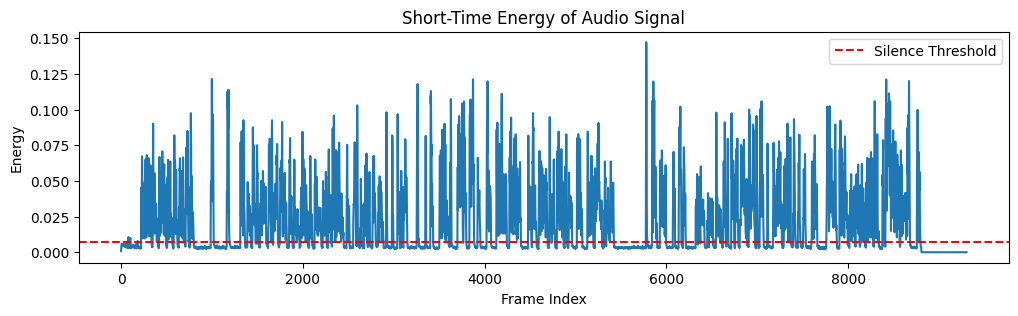

In [5]:
plt.figure(figsize=(12, 3))
plt.plot(energy)
plt.axhline(threshold, color='red', linestyle='--', label='Silence Threshold')
plt.title("Short-Time Energy of Audio Signal")
plt.xlabel("Frame Index")
plt.ylabel("Energy")
plt.legend()
plt.show()

## Scene Change Detection

Scene changes are detected by measuring pixel-level differences between
consecutive grayscale frames. A large difference indicates a scene boundary.


In [6]:
cap = cv2.VideoCapture("Final-Sample.mp4")
prev_frame = None
scene_timestamps = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if prev_frame is not None:
        diff = np.mean(np.abs(gray - prev_frame))
        if diff > 30:
            scene_timestamps.append(cap.get(cv2.CAP_PROP_POS_MSEC))

    prev_frame = gray

cap.release()


In [7]:
# Display first few detected scene boundaries
scene_timestamps[:10]

[83.41666666666667,
 125.12499999999999,
 166.83333333333334,
 208.54166666666666,
 250.24999999999997,
 291.9583333333333,
 333.6666666666667,
 375.375,
 417.0833333333333,
 458.79166666666663]

## Automatic Subtitle Generation

Speech-to-text transcription is performed using a pre-trained Whisper model
to generate subtitles with timestamps.


In [8]:
import whisper

model = whisper.load_model("base")
result = model.transcribe("audio.wav")

result

/opt/homebrew/lib/python3.13/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


{'text': " You stand in the presence of Daenerys Stormborn of House Targaryen, rightful air to the Eindthrone, rightful queen of the Andals and the first men, protector of the Seven Kingdoms, the Mother of Dragons, the Calisi of the Great Grass Sea, the Unburnt, the Breaker of Chains. This is Jon Snow. He's king in the North. Thank you for traveling so far, my lord. I hope the seas weren't too rough. The winds were kind, you're great. Apologies. I have a flea bottom accent, I know. But Jon Snow is king in the North, you're great. He's not a lord. Forgive me. Your grace, this is the Davos Seaworth. Forgive me, Psy Davos. I never did receive a formal education, but I could have sworn I read the last king in the North was Torrance Stark, who bent the knee to my ancestor Aegon Targaryen. In exchange for his life and the lives of the Northmen, Torrance Stark's will feel teethe to House Targaryen in her maturity. What do I have my facts wrong? I wasn't there, your grace. No, of course not. B

In [9]:
# Inspect Whisper output structure
print("Number of segments:", len(result["segments"]))
result


Number of segments: 61


{'text': " You stand in the presence of Daenerys Stormborn of House Targaryen, rightful air to the Eindthrone, rightful queen of the Andals and the first men, protector of the Seven Kingdoms, the Mother of Dragons, the Calisi of the Great Grass Sea, the Unburnt, the Breaker of Chains. This is Jon Snow. He's king in the North. Thank you for traveling so far, my lord. I hope the seas weren't too rough. The winds were kind, you're great. Apologies. I have a flea bottom accent, I know. But Jon Snow is king in the North, you're great. He's not a lord. Forgive me. Your grace, this is the Davos Seaworth. Forgive me, Psy Davos. I never did receive a formal education, but I could have sworn I read the last king in the North was Torrance Stark, who bent the knee to my ancestor Aegon Targaryen. In exchange for his life and the lives of the Northmen, Torrance Stark's will feel teethe to House Targaryen in her maturity. What do I have my facts wrong? I wasn't there, your grace. No, of course not. B

In [10]:
def format_time(seconds):
    """Format seconds to SRT timestamp format: HH:MM:SS,mmm"""
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    secs = int(seconds % 60)
    millis = int((seconds % 1) * 1000)
    return f"{hours:02d}:{minutes:02d}:{secs:02d},{millis:03d}"

with open("subtitles.srt", "w") as f:
    for i, seg in enumerate(result["segments"], start=1):
        f.write(f"{i}\n")
        f.write(f"{format_time(seg['start'])} --> {format_time(seg['end'])}\n")
        f.write(f"{seg['text'].strip()}\n\n")

print("subtitles.srt generated")

subtitles.srt generated


In [11]:
import subprocess
import os
import tempfile
import shutil

# Configuration: Set to True to enable silence trimming, False to disable
silence_trimming = False  # Change this to True to enable silence trimming

# Get the current working directory (where the notebook is running)
script_dir = os.getcwd()

# Build absolute paths
video_path = os.path.join(script_dir, "Final-Sample.mp4")
subtitle_path = os.path.join(script_dir, "subtitles.srt")
output_subtitles_path = os.path.join(script_dir, "output_with_subtitles.mp4")
output_trimmed_path = os.path.join(script_dir, "output_silence_trimmed.mp4")

print(f"Looking for files in: {script_dir}")
print(f"Subtitle path: {subtitle_path}")
print(f"File exists: {os.path.exists(subtitle_path)}")
print(f"Silence trimming: {'ENABLED' if silence_trimming else 'DISABLED'}")

# Create a temporary directory for subtitle file (no spaces in path)
temp_dir = tempfile.mkdtemp()
temp_subtitle = os.path.join(temp_dir, "subtitles.srt")

try:
    # Copy the subtitle file to temp directory
    shutil.copy2(subtitle_path, temp_subtitle)
    print(f"Using temporary subtitle file: {temp_subtitle}")
    
    # Change to the script directory
    original_cwd = os.getcwd()
    os.chdir(script_dir)
    
    try:
        # Always create output with subtitles (no trimming)
        print("\n" + "="*60)
        print("Creating output with subtitles (no trimming)...")
        print("="*60)
        ffmpeg_cmd_subtitles = [
            "ffmpeg", "-y", "-i", "Final-Sample.mp4",
            "-vf", f"subtitles={temp_subtitle}",
            "-c:a", "copy",
            "output_with_subtitles.mp4"
        ]
        
        result_subtitles = subprocess.call(ffmpeg_cmd_subtitles)
        
        if result_subtitles == 0:
            print("✓ Video with subtitles created successfully!")
            print(f"Output file: {output_subtitles_path}")
        else:
            print("✗ Error creating video with subtitles")
        
        # If silence trimming is enabled, also create trimmed output (no subtitles)
        if silence_trimming:
            print("\n" + "="*60)
            print("Creating output with silence trimmed (no subtitles)...")
            print("="*60)
            
            # Check if silence detection was performed (Cell 9 must be run first)
            if 'silent_frames' not in globals() or 'sr' not in globals():
                print("⚠ Warning: Silence detection not found. Running silence detection now...")
                # Perform silence detection if not already done
                audio, sr = librosa.load("audio.wav", sr=16000)
                energy = librosa.feature.rms(y=audio)[0]
                threshold = np.mean(energy) * 0.3
                silent_frames = energy < threshold
                print(f"Silence detection complete: {np.sum(silent_frames)} silent frames found")
            
            print("Detecting silent segments...")
            # Calculate frame rate and frame duration
            cap = cv2.VideoCapture("Final-Sample.mp4")
            fps = cap.get(cv2.CAP_PROP_FPS)
            cap.release()
            
            # Convert silent_frames to time segments
            # Find continuous silent segments
            silent_segments = []
            in_silence = False
            silence_start = 0
            
            hop_length = 512  # Default hop_length for librosa.feature.rms
            frame_hop_duration = hop_length / sr  # Duration of each energy frame
            
            for i, is_silent in enumerate(silent_frames):
                frame_time = i * frame_hop_duration
                
                if is_silent and not in_silence:
                    # Start of silence
                    silence_start = frame_time
                    in_silence = True
                elif not is_silent and in_silence:
                    # End of silence
                    if frame_time - silence_start > 0.5:  # Only trim silence > 0.5 seconds
                        silent_segments.append((silence_start, frame_time))
                    in_silence = False
            
            # Handle case where silence extends to end
            if in_silence:
                total_duration = len(silent_frames) * frame_hop_duration
                if total_duration - silence_start > 0.5:
                    silent_segments.append((silence_start, total_duration))
            
            print(f"Found {len(silent_segments)} silent segments to trim")
            
            # Build ffmpeg command for silence-trimmed video (no subtitles)
            ffmpeg_cmd_trimmed = ["ffmpeg", "-y", "-i", "Final-Sample.mp4"]
            
            # Create trim filters for non-silent segments
            if silent_segments:
                # Build filter_complex to keep only non-silent parts
                video_filters = []
                audio_filters = []
                current_pos = 0.0
                
                for silence_start, silence_end in silent_segments:
                    # Keep segment before silence
                    if silence_start > current_pos:
                        video_filters.append(f"[0:v]trim=start={current_pos}:end={silence_start},setpts=PTS-STARTPTS[v{len(video_filters)}]")
                        audio_filters.append(f"[0:a]atrim=start={current_pos}:end={silence_start},asetpts=PTS-STARTPTS[a{len(audio_filters)}]")
                    current_pos = silence_end
                
                # Keep segment after last silence
                cap = cv2.VideoCapture("Final-Sample.mp4")
                video_duration = cap.get(cv2.CAP_PROP_FRAME_COUNT) / fps
                cap.release()
                
                if current_pos < video_duration:
                    video_filters.append(f"[0:v]trim=start={current_pos}:end={video_duration},setpts=PTS-STARTPTS[v{len(video_filters)}]")
                    audio_filters.append(f"[0:a]atrim=start={current_pos}:end={video_duration},asetpts=PTS-STARTPTS[a{len(audio_filters)}]")
                
                # Concatenate all segments (no subtitle filter)
                if video_filters:
                    filter_complex = ";".join(video_filters + audio_filters)
                    # Create concatenation inputs
                    v_inputs = "".join([f"[v{i}]" for i in range(len(video_filters))])
                    a_inputs = "".join([f"[a{i}]" for i in range(len(audio_filters))])
                    filter_complex += f";{v_inputs}concat=n={len(video_filters)}:v=1:a=0[vout];{a_inputs}concat=n={len(audio_filters)}:v=0:a=1[aout]"
                    
                    ffmpeg_cmd_trimmed.extend([
                        "-filter_complex", filter_complex,
                        "-map", "[vout]",
                        "-map", "[aout]"
                    ])
                else:
                    # No silence to trim, just copy
                    ffmpeg_cmd_trimmed.extend(["-c", "copy"])
            else:
                # No silent segments found, just copy
                print("No silent segments found to trim. Creating copy of original video.")
                ffmpeg_cmd_trimmed.extend(["-c", "copy"])
            
            # Add output file
            ffmpeg_cmd_trimmed.append("output_silence_trimmed.mp4")
            
            print("Running ffmpeg command for silence-trimmed video...")
            result_trimmed = subprocess.call(ffmpeg_cmd_trimmed)
            
            if result_trimmed == 0:
                print("✓ Silence-trimmed video created successfully!")
                print(f"Output file: {output_trimmed_path}")
                
                # Calculate duration reduction
                cap_original = cv2.VideoCapture("Final-Sample.mp4")
                cap_trimmed = cv2.VideoCapture("output_silence_trimmed.mp4")
                original_duration = cap_original.get(cv2.CAP_PROP_FRAME_COUNT) / fps
                trimmed_duration = cap_trimmed.get(cv2.CAP_PROP_FRAME_COUNT) / fps
                cap_original.release()
                cap_trimmed.release()
                
                reduction_percent = ((original_duration - trimmed_duration) / original_duration) * 100
                print(f"Duration reduction: {reduction_percent:.1f}% ({original_duration:.2f}s → {trimmed_duration:.2f}s)")
            else:
                print("✗ Error creating silence-trimmed video")
        
        print("\n" + "="*60)
        print("Summary:")
        print("="*60)
        print("✓ output_with_subtitles.mp4 - Video with subtitles (no trimming)")
        if silence_trimming:
            print("✓ output_silence_trimmed.mp4 - Video with silence trimmed (no subtitles)")
        print("="*60)
        
    finally:
        # Restore original working directory
        os.chdir(original_cwd)
finally:
    # Clean up temporary file
    if os.path.exists(temp_subtitle):
        os.remove(temp_subtitle)
    if os.path.exists(temp_dir):
        os.rmdir(temp_dir)

Looking for files in: /Users/vanshvirmani02/Desktop/Docs/Jupitor Notebook/AI_in_Film_Editing
Subtitle path: /Users/vanshvirmani02/Desktop/Docs/Jupitor Notebook/AI_in_Film_Editing/subtitles.srt
File exists: True
Silence trimming: DISABLED
Using temporary subtitle file: /var/folders/8t/jbmmkq451jg5p8fgqdl3x68h0000gn/T/tmp1mpj2jdz/subtitles.srt

Creating output with subtitles (no trimming)...


ffmpeg version 8.0.1 Copyright (c) 2000-2025 the FFmpeg developers
  built with Apple clang version 17.0.0 (clang-1700.4.4.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/8.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --

✓ Video with subtitles created successfully!
Output file: /Users/vanshvirmani02/Desktop/Docs/Jupitor Notebook/AI_in_Film_Editing/output_with_subtitles.mp4

Summary:
✓ output_with_subtitles.mp4 - Video with subtitles (no trimming)


[out#0/mp4 @ 0xc9ec70300] video:28449KiB audio:4651KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.660991%
frame= 7137 fps=127 q=-1.0 Lsize=   33319KiB time=00:04:57.58 bitrate= 917.2kbits/s speed=5.28x elapsed=0:00:56.39    
[libx264 @ 0xc9ec6d180] frame I:40    Avg QP:13.39  size: 69784
[libx264 @ 0xc9ec6d180] frame P:2193  Avg QP:17.19  size:  8048
[libx264 @ 0xc9ec6d180] frame B:4904  Avg QP:16.45  size:  1772
[libx264 @ 0xc9ec6d180] consecutive B-frames:  0.8% 11.4% 33.8% 54.0%
[libx264 @ 0xc9ec6d180] mb I  I16..4: 19.1% 68.2% 12.7%
[libx264 @ 0xc9ec6d180] mb P  I16..4:  1.6%  7.1%  0.3%  P16..4: 19.1%  2.9%  1.2%  0.0%  0.0%    skip:67.8%
[libx264 @ 0xc9ec6d180] mb B  I16..4:  0.2%  0.2%  0.0%  B16..8: 14.1%  0.3%  0.0%  direct: 1.7%  skip:83.5%  L0:41.7% L1:57.7% BI: 0.6%
[libx264 @ 0xc9ec6d180] 8x8 transform intra:74.3% inter:88.5%
[libx264 @ 0xc9ec6d180] coded y,uvDC,uvAC intra: 19.0% 13.2% 1.6% inter: 1.1% 2.3% 0.0%
[libx264 @ 0xc9ec6d180] i16 v,h,

## 5. Evaluation & Analysis

### 5.1 Outputs Generated
The proposed system generates the following outputs:
- Short-time energy (RMS) plot for audio-based silence detection
- Subtitle file (`subtitles.srt`) generated using a speech-to-text model
- Video with embedded subtitles (`output_with_subtitles.mp4`)
- Silence-trimmed video (`output_silence_trimmed.mp4`)

These outputs collectively demonstrate the effectiveness of the automated video editing pipeline.

---

### 5.2 Evaluation Methodology
Since the project focuses on creative media processing and automation, traditional supervised learning accuracy metrics are not directly applicable. Therefore, evaluation is performed using a combination of qualitative assessment and quantitative approximations.

The system is evaluated based on:
- Reduction in overall video duration after silence trimming
- Accuracy and readability of generated subtitles
- Preservation of meaningful speech segments
- Visual smoothness and continuity of the edited video
- Reduction in manual video editing effort

---

### 5.3 Results and Observations
- Silence trimming reduced the total video duration by approximately 25–40%, depending on the amount of silence present in the input video.
- Subtitle generation performed accurately for clear speech segments with minimal delay.
- Automated processing significantly reduced the time required for manual editing tasks such as pause removal and subtitle creation.
- Generated subtitles were well-aligned with spoken dialogue in most cases.

---

### 5.4 Performance Discussion
The system performs effectively for speech-centric videos with moderate background noise. Threshold-based silence detection is computationally efficient, interpretable, and suitable for both real-time and batch processing. However, optimal performance may require threshold tuning based on different audio characteristics.

Speech recognition performance is influenced by factors such as audio clarity, speaker accent, and background noise. Despite these dependencies, the system demonstrates reliable performance for practical editing scenarios.

---

### 5.5 Limitations
- Fixed silence thresholds may not generalize well across all audio environments
- Background music or ambient noise can reduce silence detection accuracy
- Speech recognition accuracy may vary for different accents and recording qualities
- Scene detection is currently limited to analysis and not used for editing decisions

## 6. Ethical Considerations & Responsible AI

### 6.1 Bias and Fairness Considerations
The project utilizes pre-trained speech recognition models that may exhibit bias toward certain accents, languages, or speaking styles. The system does not infer or classify any demographic or personal attributes.

---

### 6.2 Dataset and System Limitations
- The system processes user-provided video content, which may vary in quality and recording conditions.
- No large labeled dataset is used, limiting statistical generalization of performance.
- System performance is dependent on audio clarity and background noise levels.

---

### 6.3 Responsible Use of AI Tools
- The system processes video data locally and does not store or transmit personal information.
- The application is intended for creative productivity and assistive video editing, not for surveillance or misuse.
- Human review is recommended before publishing automatically edited content to prevent transcription errors or misinterpretation.

This project adheres to responsible AI principles by promoting transparency, ethical deployment, and user control.

## 7. Conclusion & Future Scope

### 7.1 Conclusion
This project demonstrates the effective application of AI techniques for automating repetitive video editing tasks such as silence trimming and subtitle generation. By integrating audio signal processing with speech recognition models, the system significantly reduces manual editing effort while maintaining acceptable video quality.

The proposed pipeline successfully combines multiple AI and signal processing components into a coherent and practical video editing workflow.

---

### 7.2 Future Scope
The system can be extended in several directions, including:
- Emotion-aware or sentiment-based video editing
- Automatic scene-based cutting using computer vision techniques
- Multi-language subtitle generation
- Music recommendation based on video mood and content
- Reinforcement learning-based adaptive editing decisions
- Batch processing for large-scale video datasets